In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pyarrow.feather as feather 

from matplotlib.colors import LinearSegmentedColormap



/home/point/Documents/work/research/pmayp/Project/lucy/gbm


In [22]:
#Import data
score_meta_4subtypes = feather.read_feather("output/score_4subtype_meta.feather")

In [23]:
# Calculate the frequency of each unique combination of x, y, and z
freq_table = score_meta_4subtypes.groupby(['AClike', 'NPClike', 'OPClike']).size().reset_index(name='count')

In [24]:
# Merge the frequencies back into the original DataFrame
data = pd.merge(score_meta_4subtypes, freq_table, on=['AClike', 'NPClike', 'OPClike'])  

# Normalize the counts to be between 1 and 10
data['normalized_count'] = np.interp(data['count'], (data['count'].min(), data['count'].max()), (1, 10))


# Adjust the size based on the count
sizes = data['normalized_count']


In [25]:
# Create a custom colormap from white to purple
cmap = LinearSegmentedColormap.from_list('white_to_purple', ['white', 'purple'])

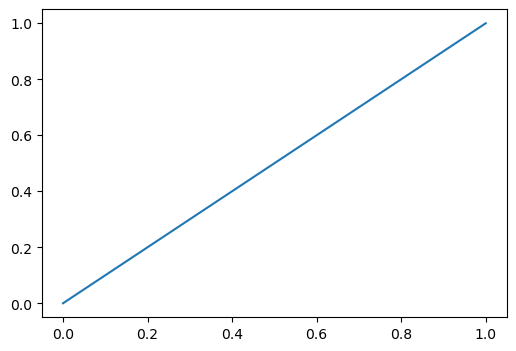

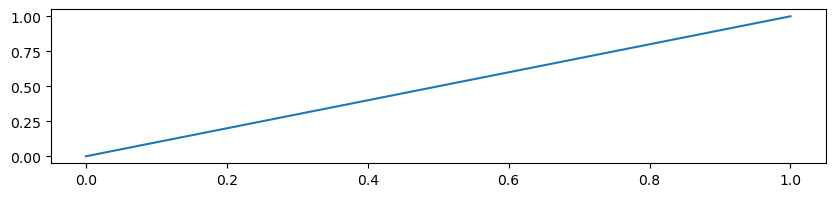

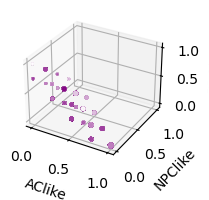

In [31]:
# Create a 3D scatter plot with variable point sizes
fig = plt.figure(figsize=(2, 8)) 
ax = plt.axes(projection ="3d")
# Scatter plot
scatter = ax.scatter3D(data['AClike'], data['NPClike'], data['OPClike'], s=sizes, c=data['MESlike'], cmap=cmap)
# Add labels
ax.set_xlabel('AClike')
ax.set_ylabel('NPClike')
ax.set_zlabel('OPClike')

#plt.tight_layout(pad=100.0)
# Add color bar
#cbar = fig.colorbar(scatter, ax=ax)

plt.show()